<a href="https://colab.research.google.com/github/raj-vijay/ml/blob/master/05.Cluster%20Analysis%20in%20Python/12_Dominant_colors_in_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from scipy.cluster.vq import kmeans, vq
from matplotlib import pyplot as plt
import seaborn as sns, pandas as pd
import random
random.seed((1000,2000))

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
import matplotlib.image as img
image = img.imread('batman.jpg')
image.shape

(169, 269, 3)

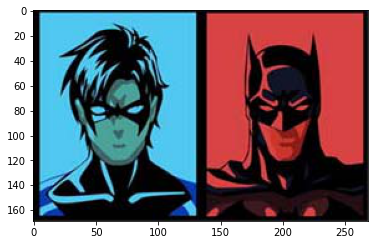

In [ ]:
plt.imshow(image)

In [ ]:
r = []
g = []
b = []
for row in image:
  for pixel in row:
    # A pixel contains RGB values
    temp_r, temp_g, temp_b = pixel
    r.append(temp_r)
    g.append(temp_g)
    b.append(temp_b)

In [ ]:
batman_df = pd.DataFrame({'red': r,
'blue': b,
'green': g})
pixels.head()

,red,blue,green
0,36,25,28
1,39,19,21
2,52,21,20
3,61,28,27
4,37,18,15


In [ ]:
batman_df = batman_df.astype(float)

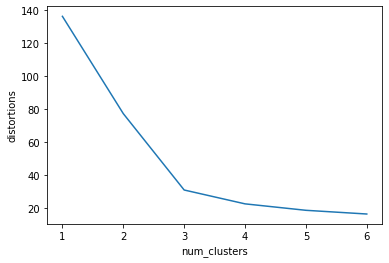

In [ ]:
distortions = []
num_clusters = range(1, 7)

# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(batman_df[['red', 'blue', 'green']], i)
    distortions.append(distortion)

# Create a data frame with two lists, num_clusters and distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

# Create a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)
plt.xticks(num_clusters)
plt.show()

In [ ]:
colors = []
# Get standard deviations of each color
r_std, g_std, b_std = batman_df[['red', 'green', 'blue']].std()

for cluster_center in cluster_centers:
    scaled_r, scaled_g, scaled_b = cluster_center
    # Convert each standardized value to scaled value
    colors.append((
        scaled_r * r_std / 255,
        scaled_g * g_std / 255,
        scaled_b * b_std / 255
    ))

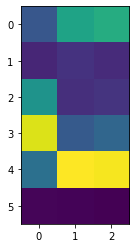

In [ ]:
# Display colors of cluster centers
plt.imshow(colors)
plt.show()